<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li><li><span><a href="#Drop-Samples-with-no-replicates" data-toc-modified-id="Drop-Samples-with-no-replicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop Samples with no replicates</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Show files in the data directory</font>

In [5]:
data_dir = path.join('../data/')
os.listdir(data_dir)

<font size="4">Enter name of curated metadata file here</font>

In [6]:
metadata_file = "_2020-08-20.tsv" # Enter metadata filename here

## Load expression data

In [7]:
DF_log_tpm = pd.read_csv(path.join(data_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 2296
Number of samples: 116


In [8]:
DF_log_tpm.head()

,SRX3565197,SRX2781382,SRX4001525,SRX3565174,SRX6762910,SRX5495523,SRX3823527,SRX3565187,SRX2548838,SRX3565203,...,SRX4001517,SRX5653267,SRX3565175,ERX3018360,ERX3018361,SRX3565189,SRX3565168,SRX3467357,SRX3565173,SRX3565172
Synonym,,,,,,,,,,,,,,,,,,,,,
SACI_RS00005,5.269578,7.883667,7.939798,6.890248,8.810122,8.529613,7.797435,7.455870,8.233796,6.629272,...,8.322835,7.679029,6.655219,8.967497,8.417129,6.831740,4.587188,9.022633,6.498048,6.288708
SACI_RS00010,4.518440,8.060876,6.461626,5.622223,8.420537,8.258344,6.715096,6.394491,6.763681,6.169149,...,6.112812,6.763317,5.755257,8.080377,7.920618,6.002169,2.613377,8.108422,5.401074,4.994199
SACI_RS00015,11.024625,11.168191,11.775624,12.913056,11.090120,10.606115,11.099548,12.335588,11.296925,11.101595,...,11.851360,10.862572,11.567606,10.861308,11.147948,10.663183,12.329937,10.857759,11.636880,12.706091
SACI_RS00020,6.747673,2.782238,6.366539,7.062894,5.795639,6.007733,5.692003,7.152947,6.876332,6.026868,...,6.168594,5.533535,7.077818,5.131887,5.788980,6.604440,7.513623,5.605870,7.621792,7.599522
SACI_RS00025,8.533264,4.779068,8.613596,9.134360,7.885170,7.741913,8.496711,8.804496,6.876332,7.892012,...,8.680297,8.121945,8.610315,7.886331,8.041154,8.003974,9.139879,8.063733,9.490924,9.140590


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [9]:
DF_qc_stats = pd.read_csv(path.join(data_dir,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 117


In [10]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,mRNA-sense,mRNA-antisense,rRNA-sense,rRNA-antisense,tRNA-sense,tRNA-antisense,ncRNA-sense,ncRNA-antisense,unannotated,total-reads,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ERX1518397,13208.0,455.0,24138.0,0.0,0.0,0.0,0.0,0.0,7742.0,8365915.0,...,8929982,607238776,3896544,545607801,10.149381,0.0625,0.9375,0.0000,0.0,0.0
ERX1518398,5114.0,222.0,12450.0,0.0,0.0,0.0,0.0,0.0,4224.0,4886827.0,...,5489885,373312180,2954939,301318297,19.285169,0.0000,1.0000,0.0000,0.0,0.0
ERX1518399,11439.0,738.0,18081.0,0.0,0.0,0.0,0.0,0.0,6642.0,6932975.0,...,7366354,552476550,9876077,515391384,6.712532,0.0000,1.0000,0.0000,0.0,0.0
ERX3018360,1497578.0,0.0,9907054.0,0.0,0.0,0.0,0.0,0.0,115198.0,11768789.0,...,11779481,1460655644,6687967,1422787367,2.592553,0.0132,0.9770,0.0098,0.0,0.0
ERX3018361,966509.0,0.0,6393827.0,0.0,0.0,0.0,0.0,0.0,74347.0,7611559.0,...,7618684,944716816,4641411,925248512,2.060756,0.0185,0.9720,0.0095,0.0,0.0


## Load metadata

In [11]:
DF_metadata = pd.read_csv(path.join(data_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 117


,species_tax_id,BioSample,LibraryLayout,species,ProjectID,class_tax_id,ReleaseDate,LibrarySource,ScientificName,InsertSize,...,base_media,carbon_source,nitrogen_source,aerobicity,supplement,temperature,pH,growth_phase,OD,additional_notes
Experiment,,,,,,,,,,,,,,,,,,,,,
ERX1518397,2285,SAMEA4025321,PAIRED,Sulfolobus acidocaldarius,328939,183924,2016-07-14 11:49:35,TRANSCRIPTOMIC,Sulfolobus acidocaldarius DSM 639,300,...,Brock,NaN,(NH4)2SO4(1.3),NaN,0.1% Tryptophan (Difco),NaN,NaN,NaN,NaN,NaN
ERX1518398,2285,SAMEA4025322,PAIRED,Sulfolobus acidocaldarius,328939,183924,2016-07-14 11:49:35,TRANSCRIPTOMIC,Sulfolobus acidocaldarius DSM 639,300,...,Brock,NaN,(NH4)2SO4(1.3),NaN,0.1% Tryptophan (Difco),NaN,NaN,NaN,NaN,NaN
ERX1518399,2285,SAMEA4025323,PAIRED,Sulfolobus acidocaldarius,328939,183924,2016-07-14 11:49:35,TRANSCRIPTOMIC,Sulfolobus acidocaldarius DSM 639,300,...,Brock,NaN,(NH4)2SO4(1.3),NaN,0.1% Tryptophan (Difco),NaN,NaN,NaN,NaN,NaN
ERX3018360,2285,SAMEA5198179,PAIRED,Sulfolobus acidocaldarius,512828,183924,2019-01-24 13:14:25,TRANSCRIPTOMIC,Sulfolobus acidocaldarius DSM 639,199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX3018361,2285,SAMEA5198180,PAIRED,Sulfolobus acidocaldarius,512828,183924,2019-01-24 13:14:25,TRANSCRIPTOMIC,Sulfolobus acidocaldarius DSM 639,210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove extra sample rows

<font size="4">Ensure that metadata and qc_stats data contain all log_tpm sample information</font>

In [12]:
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [13]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [14]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

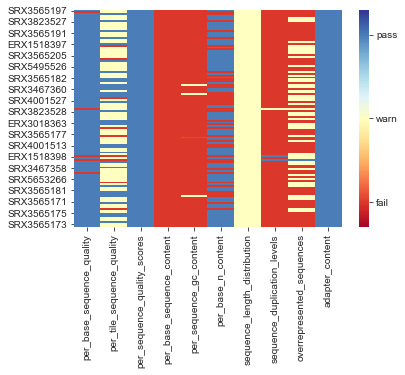

In [15]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [16]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [17]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
SRX2781382,fail,pass,fail,pass
SRX4001525,pass,pass,fail,pass
SRX3823527,pass,pass,fail,pass
SRX3823533,pass,pass,fail,pass
SRX3823530,pass,pass,fail,pass
SRX4001523,pass,pass,fail,pass
SRX4001518,pass,pass,fail,pass
SRX3823523,pass,pass,fail,pass
SRX4001512,pass,pass,fail,pass
SRX3823522,pass,pass,fail,pass


<font size="4">Mark samples as failed.</font>

In [18]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [24]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

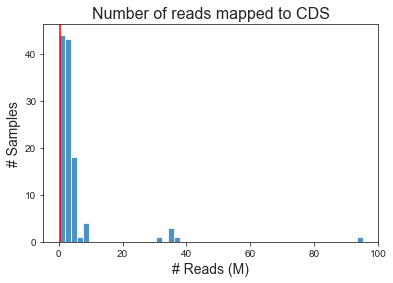

In [25]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [26]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,mRNA-sense,mRNA-antisense,rRNA-sense,rRNA-antisense,tRNA-sense,tRNA-antisense,ncRNA-sense,ncRNA-antisense,unannotated,total-reads,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ERX1518398,5114.0,222.0,12450.0,0.0,0.0,0.0,0.0,0.0,4224.0,4886827.0,...,5489885,373312180,2954939,301318297,19.285169,0.0000,1.0000,0.0000,0.0000,0.0000
ERX1518399,11439.0,738.0,18081.0,0.0,0.0,0.0,0.0,0.0,6642.0,6932975.0,...,7366354,552476550,9876077,515391384,6.712532,0.0000,1.0000,0.0000,0.0000,0.0000
ERX1518397,13208.0,455.0,24138.0,0.0,0.0,0.0,0.0,0.0,7742.0,8365915.0,...,8929982,607238776,3896544,545607801,10.149381,0.0625,0.9375,0.0000,0.0000,0.0000
SRX2548840,285416.0,16789.0,1124874.0,0.0,16789.0,0.0,0.0,0.0,251837.0,6346266.0,...,10111800,319906842,1385320,303113159,5.249554,0.0000,0.0000,0.0195,0.9252,0.0553
SRX2781382,329910.0,62840.0,47130.0,0.0,0.0,0.0,0.0,0.0,1131121.0,4760383.0,...,5192923,280108073,781617,260898695,6.857845,0.0000,0.0000,0.1489,0.6502,0.2009
SRX2548839,364328.0,101202.0,60721.0,0.0,0.0,0.0,0.0,0.0,1497795.0,6103884.0,...,6615689,337487202,920596,327766437,2.880336,0.0000,0.0000,0.1882,0.5947,0.2170


<font size="4">Mark samples as failed.</font>

In [27]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [28]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  7


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

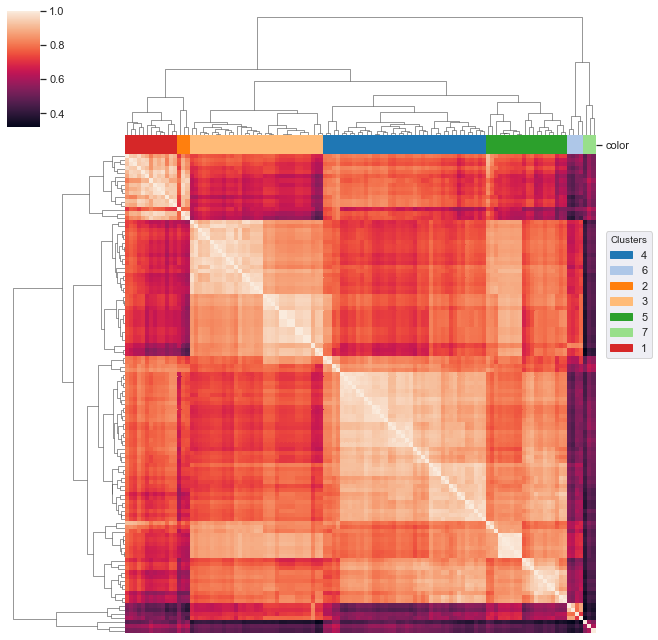

In [29]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [30]:
#indicate which clusters you want to remove
remove_clst = [6,7]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [31]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [32]:
DF_metadata.head()

,species_tax_id,BioSample,LibraryLayout,species,ProjectID,class_tax_id,ReleaseDate,LibrarySource,ScientificName,InsertSize,...,supplement,temperature,pH,growth_phase,OD,additional_notes,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
SRX3565197,2285,SAMN07621591,SINGLE,Sulfolobus acidocaldarius,403223,183924,2018-01-16 10:29:12,TRANSCRIPTOMIC,Sulfolobus acidocaldarius,0,...,NaN,80.0,2.4,Log phase (B),NaN,NaN,True,True,True,True
SRX2781382,2285,SAMN06886775,SINGLE,Sulfolobus acidocaldarius,373915,183924,2017-05-03 13:31:14,TRANSCRIPTOMIC,Sulfolobus acidocaldarius,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
SRX4001525,2285,SAMN08988058,PAIRED,Sulfolobus acidocaldarius,453776,183924,2018-12-23 11:52:17,TRANSCRIPTOMIC,Sulfolobus acidocaldarius,0,...,10µg/mL uracil,75.0,3.5,NaN,NaN,120 minutes after exposure to nutrient limitation,False,True,True,True
SRX3565174,2285,SAMN07621132,SINGLE,Sulfolobus acidocaldarius,403195,183924,2018-01-16 10:31:12,TRANSCRIPTOMIC,Sulfolobus acidocaldarius,0,...,NaN,65.0,3.5,Stationary phase (A),NaN,NaN,True,True,True,True
SRX6762910,2285,SAMN12644730,PAIRED,Sulfolobus acidocaldarius,526225,183924,2019-09-19 16:33:15,TRANSCRIPTOMIC,Sulfolobus acidocaldarius,0,...,"0.2% sucrose, 0.1% tryptone, 10µg/mL uracil",78.0,3.2,Log phase cells,NaN,NaN,True,True,True,True


# Remove failed samples

In [33]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [34]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

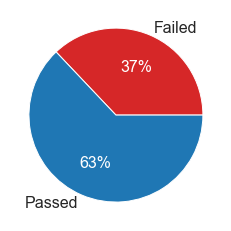

In [35]:
_,_,pcts = plt.pie(pass_qc.value_counts().reindex([True,False]),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [36]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA526225    8
PRJNA531435    6
PRJNA422245    4
PRJEB30507     4
PRJNA388657    2
PRJNA403228    1
PRJNA403229    1
PRJNA403216    1
PRJNA403189    1
PRJNA403198    1
PRJNA403214    1
PRJNA403222    1
PRJNA403187    1
PRJNA403230    1
PRJNA403196    1
PRJNA403181    1
PRJNA213193    1
PRJNA403227    1
PRJNA403192    1
PRJNA403226    1
PRJNA403235    1
PRJNA403204    1
PRJNA403225    1
PRJNA403186    1
PRJNA403201    1
PRJNA403219    1
PRJNA403218    1
PRJNA403217    1
PRJNA403236    1
PRJNA403203    1
PRJNA403215    1
PRJNA403220    1
PRJNA403221    1
PRJNA403200    1
PRJNA403182    1
PRJNA403195    1
PRJNA403213    1
PRJNA403211    1
PRJNA403190    1
PRJNA403206    1
PRJNA403191    1
PRJNA373915    1
PRJNA403202    1
PRJNA403183    1
PRJNA403208    1
PRJNA403224    1
PRJNA403223    1
PRJNA403188    1
PRJNA403207    1
PRJNA403209    1
PRJNA403231    1
PRJNA403199    1
PRJNA403205    1
PRJNA403197    1
Name: BioProject, dtype: int64

## BioProject counts of all metadata

In [37]:
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA453776    18
PRJNA439217    18
PRJNA526225     8
PRJNA531435     6
PRJNA373915     5
PRJEB30507      4
PRJNA422245     4
PRJEB14292      3
PRJNA388657     2
PRJNA403204     1
PRJNA403203     1
PRJNA403228     1
PRJNA213193     1
PRJNA403181     1
PRJNA403226     1
PRJNA403216     1
PRJNA403229     1
PRJNA403235     1
PRJNA403186     1
PRJNA403218     1
PRJNA403225     1
PRJNA403197     1
PRJNA403187     1
PRJNA403236     1
PRJNA403201     1
PRJNA403214     1
PRJNA403198     1
PRJNA403230     1
PRJNA403217     1
PRJNA403231     1
PRJNA403189     1
PRJNA403192     1
PRJNA403215     1
PRJNA403220     1
PRJNA403221     1
PRJNA403200     1
PRJNA403182     1
PRJNA403195     1
PRJNA403213     1
PRJNA403211     1
PRJNA403199     1
PRJNA403227     1
PRJNA403206     1
PRJNA403191     1
PRJNA403202     1
PRJNA403183     1
PRJNA403208     1
PRJNA403224     1
PRJNA403223     1
PRJNA403188     1
PRJNA403207     1
PRJNA403209     1
PRJNA403190     1
PRJNA403196     1
PRJNA403205     1
PRJNA40321

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [38]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [39]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. </font>

In [1]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [48]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

In [49]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.98


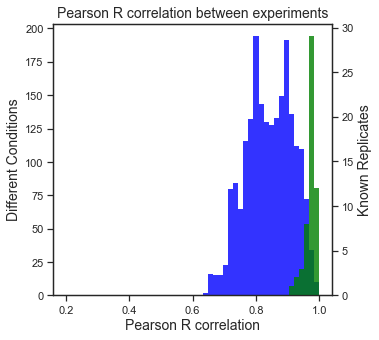

In [50]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [2]:
#pearson r cutoff for replicates
rcutoff = 0.95

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

NameError: name 'DF_metadata' is not defined

## Drop Samples with no replicates

In [40]:
cond_counts = DF_metadata_passed.condition_name.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['nc_rna5', 'nc_rna6', '65_1.6_stat', '65_3.5_log', 'nc_rna8', 'nc_rna7',
       '75_3.5_log'],
      dtype='object')

In [41]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_name.isin(drop_conds)

In [42]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

# Remove failed samples

In [52]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [53]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [54]:
DF_metadata_final.shape

(66, 53)

In [55]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

# Save final datasets

In [17]:
DF_log_tpm_final.to_csv(os.path.join(data_dir,'log_tpm_qc.csv'))
DF_metadata_final.to_csv(os.path.join(data_dir,'metadata_qc.csv'))